## Results for Bioinformatics Advances Paper

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import numpy as np
from pandas_plink import read_plink
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

In [3]:
files = np.load('results_freesurfer_indvtask_allgenes_210222.npz')

In [4]:
RMSE_rf_all = files['RMSE_rf']
RMSE_rid_all = files['RMSE_rid']
RMSE_las_all = files['RMSE_las']

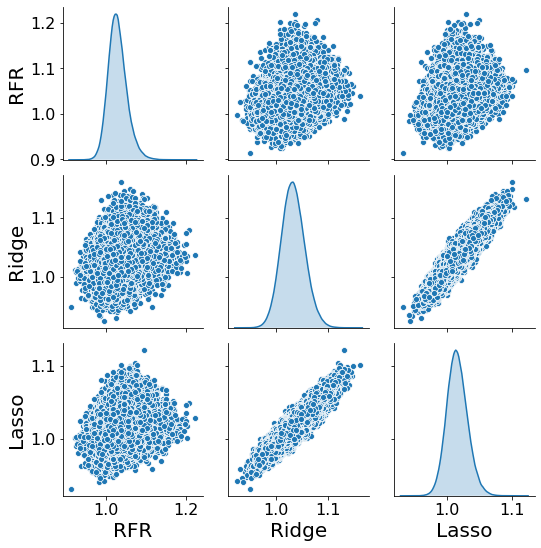

In [11]:
#df_R2 = pd.DataFrame([RMSE_rf_all,RMSE_rid_all,RMSE_las_all]).T
#df_R2.columns = ['RFR', 'Ridge', 'Lasso']
#plt.rcParams["axes.labelsize"] = 20
#plt.rcParams["xtick.labelsize"]=  16
#plt.rcParams["ytick.labelsize"]=  16
#sns.pairplot(df_R2, diag_kind='kde', height=2.5)
#plt.savefig('C:\\Users\\ammar\\Desktop\\manuscript\\pairplot.png')

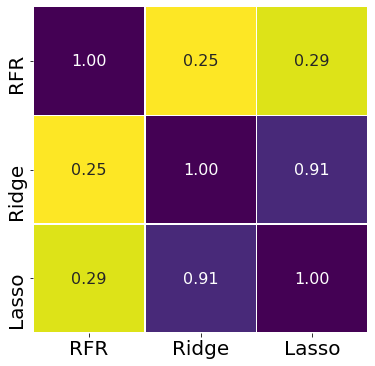

In [16]:
#fig, ax = plt.subplots(figsize=(6,6))
# calculate the correlation matrix
#corr = df_R2.corr(method='spearman')

# plot the heatmap
#ax = sns.heatmap(corr, 
#        xticklabels=corr.columns,
#        yticklabels=corr.columns, cmap='viridis_r',  annot=True, fmt=".2f", linewidths=.5, cbar=False,
#                annot_kws={"fontsize":16})

#ax.tick_params(labelsize=20)
#plt.savefig('C:\\Users\\ammar\\Desktop\\manuscript\\heatmap_methods.png')

In [ ]:
# data_all = pd.DataFrame([])
# data_all['RFR'] = RMSE_rf_all
# data_all['Ridge'] = RMSE_rid_all
# data_all['Lasso'] = RMSE_las_all

In [5]:
(bim, fam, G) = read_plink('C:\\Users\\ammar\\Downloads\\plink_win64_20201019\\cleaned_new')

Mapping files: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.81it/s]


In [ ]:
snplist = pd.read_csv('C:\\Users\\ammar\\Downloads\\plink_win64_20201019\\cleaned_new_ceu.snplist', sep=" ", header=None)

In [ ]:
filt_idx = np.hstack([np.where(bim.snp.isin(snplist[0]))[0], -1])

In [ ]:
bim_filt = bim.loc[np.where(bim.snp.isin(snplist[0]))[0]]

In [ ]:
RMSE_rf_all = RMSE_rf_all[filt_idx]
RMSE_rid_all = RMSE_rid_all[filt_idx]
RMSE_las_all = RMSE_las_all[filt_idx]

In [ ]:
files = np.load('results_ml_gwas_fs_21022022.npz')

In [ ]:
RMSE_rf_ceu = files['RMSE_rf']
RMSE_rid_ceu = files['RMSE_rid']
RMSE_las_ceu = files['RMSE_las']

In [ ]:
print(RMSE_rf_all.shape, RMSE_rf_ceu.shape)

In [ ]:
data_all = pd.DataFrame([])
data_all['rmse'] = np.hstack([RMSE_rf_all, RMSE_las_all, RMSE_rid_all])
data_all['method'] = np.hstack([np.asarray(['RFR']*len(RMSE_rf_all)), np.asarray(['Lasso']*len(RMSE_las_all)), 
          np.asarray(['Ridge']*len(RMSE_rid_all))])
data_all['race'] = np.hstack([np.asarray(['ALL'])]*len(data_all))

In [ ]:
data_ceu = pd.DataFrame([])
data_ceu['rmse'] = np.hstack([RMSE_rf_ceu, RMSE_las_ceu, RMSE_rid_ceu])
data_ceu['method'] = np.hstack([np.asarray(['RFR']*len(RMSE_rf_ceu)), np.asarray(['Lasso']*len(RMSE_las_ceu)), 
          np.asarray(['Ridge']*len(RMSE_rid_ceu))])
data_ceu['race'] = np.hstack([np.asarray(['CEU'])]*len(data_ceu))

In [ ]:
data = pd.concat([data_all, data_ceu])

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))

PROPS = {'boxprops':{'edgecolor':'black'},
         'medianprops': {'color':'black'},
         'whiskerprops': {'color': 'black'},
         'capprops': {'color': 'black'}
        }

ax = sns.boxplot(x="method", y="rmse", data=data, hue = "race",showfliers = False, linewidth = 3, **PROPS)
ax.set_xlabel("Method", fontsize=22, fontweight='bold')
ax.set_ylabel("RMSE", fontsize=22, fontweight='bold')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)

ax.tick_params(length = 8, width=4, labelsize = 20, direction = 'in')

ax.legend(fontsize=16)

ax.set_ylim([0, 1.35])
#plt.savefig('C:\\Users\\ammar\\Desktop\\manuscript\\RMSE_dist_comp.png')

In [ ]:
rng = np.random.default_rng()
sample1 = rng.uniform(-1, 1, 200)
sample2 = rng.uniform(-0.5, 1.5, 300)

In [ ]:
print(sample1.shape, sample2.shape)

In [ ]:
stats.ranksums(RMSE_rf_all,RMSE_rf_ceu)

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(RMSE_rf_all,RMSE_rf_ceu, s=50)
#ax.plot(np.arange(len(RMSE_rf_all)), RMSE_rf_all, 'ro')

# ax.plot(RMSE_rf_all, 'ro')
# ax.plot(RMSE_rf_ceu, 'bo')

ax.set_xlabel("RMSE (ALL SAMPLES)", fontsize=22, fontweight='bold')
ax.set_ylabel("RMSE (CEU SAMPLES)", fontsize=22, fontweight='bold')


ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)

ax.tick_params(length = 8, width=4, labelsize = 20, direction = 'in')

ax.set_xlim([RMSE_rf_all.min(), RMSE_rf_all.max()])
ax.set_ylim([RMSE_rf_ceu.min(), RMSE_rf_ceu.max()])

In [ ]:
sns.distplot(RMSE_rf_all)
sns.distplot(RMSE_rf_ceu)

In [ ]:
sns.distplot(RMSE_las_all)
sns.distplot(RMSE_las_ceu)

In [ ]:
sns.distplot(RMSE_rid_all)
sns.distplot(RMSE_rid_ceu)

In [ ]:
snplist = bim.snp.values

In [ ]:
stats.rankdata(RMSE_rf_all)

In [13]:
df_chrom = pd.DataFrame()

# df_chrom['chrom'] = bim.chrom[np.where(bim.snp.isin(snplist[0]))[0]]
# df_chrom['snp'] = bim.snp[np.where(bim.snp.isin(snplist[0]))[0]]
# df_chrom['posit'] = bim.pos[np.where(bim.snp.isin(snplist[0]))[0]]

df_chrom['chrom'] = bim.chrom
df_chrom['snp'] = bim.snp
df_chrom['posit'] = bim.pos


df_chrom = df_chrom.append(pd.DataFrame([19,'APOE',50103781], index = ['chrom', 'snp', 'posit']).T, ignore_index=True)
df_chrom.chrom = df_chrom.chrom.astype(int)
df_chrom.posit = df_chrom.posit.astype(int)

# df_chrom['rmse_las'] = -np.log10(RMSE_las_ceu)
# df_chrom['rmse_rid'] = -np.log10(RMSE_rid_ceu)
# df_chrom['rmse_rf'] = -np.log10(RMSE_rf_ceu)

# df_chrom['rmse_las_ceu'] = (RMSE_las_ceu)
# df_chrom['rmse_rid_ceu'] = (RMSE_rid_ceu)
# df_chrom['rmse_rf_ceu'] = (RMSE_rf_ceu)

df_chrom['rmse_las_all'] = (RMSE_las_all)
df_chrom['rmse_rid_all'] = (RMSE_rid_all)
df_chrom['rmse_rf_all'] = (RMSE_rf_all)


# df_chrom['pvals_rf'] = -np.log10((stats.rankdata(RMSE_rf_all)/RMSE_rf_all.shape[0]))
# df_chrom['pvals_las'] = -np.log10((stats.rankdata(RMSE_las_all)/RMSE_rf_all.shape[0]))
# df_chrom['pvals_rid'] = -np.log10((stats.rankdata(RMSE_rid_all)/RMSE_rf_all.shape[0]))

df_chrom['pvals_rf'] = ((stats.rankdata(RMSE_rf_all)/RMSE_rf_all.shape[0]))
df_chrom['pvals_las'] = ((stats.rankdata(RMSE_las_all)/RMSE_rf_all.shape[0]))
df_chrom['pvals_rid'] = ((stats.rankdata(RMSE_rid_all)/RMSE_rf_all.shape[0]))

df_chrom = df_chrom.sort_values(by =['chrom','posit'])
df_chrom.chrom = df_chrom.chrom.astype('category')
df_chrom['ind'] = range(len(df_chrom))
df_grouped = df_chrom.groupby(('chrom'))

In [ ]:
fig,ax = plt.subplots(3, 1, figsize=(15,10), sharex=True, sharey=False)

colors = ['red','blue', 'green', 'orange', 'olive','purple', 'black','gray','seagreen','brown', 'peru',
         'dimgray','dodgerblue','coral','indigo','darkgoldenrod','violet','teal','chocolate','deepskyblue',
         'crimson','royalblue']
x_labels = []
x_labels_pos = []

chr_lab = ['Chr1', 'Chr2', 'Chr3', 'Chr4']
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='rmse_las',color=colors[num % len(colors)], ax=ax[0], s=20)
    group.plot(kind='scatter', x='ind', y='rmse_rid',color=colors[num % len(colors)], ax=ax[1], s=20)
    group.plot(kind='scatter', x='ind', y='rmse_rf',color=colors[num % len(colors)], ax=ax[2], s=20)

#     ax[2].annotate('rs429358/APOE', xy=(200544, 0.039), xytext=(183000, 0.039),
#          arrowprops=dict(facecolor='black', shrink=0.005))
    x_labels.append('Chr'+str(name))
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

methods = ['Lasso', 'Ridge','Random Forest']
i = 0
for axs in ax:
    axs.set_xticks(x_labels_pos)
    axs.spines['left'].set_linewidth(2)
    axs.spines['bottom'].set_linewidth(2)
    axs.spines['right'].set_linewidth(2)
    axs.spines['top'].set_linewidth(2)
    axs.invert_yaxis()
    axs.tick_params(labelsize=14, length = 6, width=2)
    axs.set_xticklabels(x_labels)
    #axs.set_ylim([-0.025, 0.04])
    axs.set_ylim([1.0, 0.9])
    axs.set_xlabel('Chromosome', fontsize=18, fontweight='bold')
    #axs.set_ylabel('$-log_{10}(RMSE)$', fontsize=18, fontweight='bold')
    axs.set_ylabel('$(RMSE)$', fontsize=18, fontweight='bold')
#     axs.set_title(methods[i], fontsize=18, fontweight='bold', y = 1.0, pad=-50)
#    i += 1
ax[0].set_title(methods[0], fontsize=20, fontweight='bold', y = 0.85)
ax[1].set_title(methods[1], fontsize=20, fontweight='bold', y = 0.85)
ax[2].set_title(methods[2], fontsize=20, fontweight='bold',y = 0.85)
plt.xticks(rotation=90)

In [ ]:
fig,ax = plt.subplots(3, 1, figsize=(15,10), sharex=True, sharey=False)

colors = ['red','blue', 'green', 'orange', 'olive','purple', 'black','gray','seagreen','brown', 'peru',
         'dimgray','dodgerblue','coral','indigo','darkgoldenrod','violet','teal','chocolate','deepskyblue',
         'crimson','royalblue']
x_labels = []
x_labels_pos = []

chr_lab = ['Chr1', 'Chr2', 'Chr3', 'Chr4']
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='rmse_las_all',color='tab:red', ax=ax[0], s=20, alpha = 0.80)
    group.plot(kind='scatter', x='ind', y='rmse_las_ceu',color='tab:blue', ax=ax[0], s=20, alpha = 0.25)
    
    group.plot(kind='scatter', x='ind', y='rmse_rid_all',color='tab:red', ax=ax[1], s=20, alpha = 0.80)
    group.plot(kind='scatter', x='ind', y='rmse_rid_ceu',color='tab:blue', ax=ax[1], s=20, alpha = 0.25)

    group.plot(kind='scatter', x='ind', y='rmse_rf_all',color='tab:red', ax=ax[2], s=20, alpha = 0.80)
    group.plot(kind='scatter', x='ind', y='rmse_rf_ceu',color='tab:blue', ax=ax[2], s=20, alpha = 0.25)

#     ax[2].annotate('rs429358/APOE', xy=(200544, 0.039), xytext=(183000, 0.039),
#          arrowprops=dict(facecolor='black', shrink=0.005))
    x_labels.append('Chr'+str(name))
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

methods = ['Lasso', 'Ridge','Random Forest']
i = 0
for axs in ax:
    axs.set_xticks(x_labels_pos)
    axs.spines['left'].set_linewidth(2)
    axs.spines['bottom'].set_linewidth(2)
    axs.spines['right'].set_linewidth(2)
    axs.spines['top'].set_linewidth(2)
    axs.invert_yaxis()
    axs.tick_params(labelsize=14, length = 6, width=2)
    axs.set_xticklabels(x_labels)
    #axs.set_ylim([-0.025, 0.04])
    axs.set_ylim([1.0, 0.9])
    axs.set_xlabel('Chromosome', fontsize=18, fontweight='bold')
    #axs.set_ylabel('$-log_{10}(RMSE)$', fontsize=18, fontweight='bold')
    axs.set_ylabel('$(RMSE)$', fontsize=18, fontweight='bold')
#     axs.set_title(methods[i], fontsize=18, fontweight='bold', y = 1.0, pad=-50)
#    i += 1
ax[0].set_title(methods[0], fontsize=20, fontweight='bold', y = 0.85)
ax[1].set_title(methods[1], fontsize=20, fontweight='bold', y = 0.85)
ax[2].set_title(methods[2], fontsize=20, fontweight='bold',y = 0.85)
plt.xticks(rotation=90)

In [ ]:
fig,ax = plt.subplots(3, 1, figsize=(15,10), sharex=True, sharey=False)

colors = ['red','blue', 'green', 'orange', 'olive','purple', 'black','gray','seagreen','brown', 'peru',
         'dimgray','dodgerblue','coral','indigo','darkgoldenrod','violet','teal','chocolate','deepskyblue',
         'crimson','royalblue']
x_labels = []
x_labels_pos = []

chr_lab = ['Chr1', 'Chr2', 'Chr3', 'Chr4']
for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='pvals_las',color=colors[num % len(colors)], ax=ax[0], s=20)
    group.plot(kind='scatter', x='ind', y='pvals_rid',color=colors[num % len(colors)], ax=ax[1], s=20)
    group.plot(kind='scatter', x='ind', y='pvals_rf',color=colors[num % len(colors)], ax=ax[2], s=20)

    ax[2].annotate('rs429358/APOE', xy=(485000, 5.55), xytext=(400000, 5.55),
         arrowprops=dict(facecolor='black', shrink=0.005), size = 12)
    
    ax[0].annotate('rs429358/APOE', xy=(487000, 5.60), xytext=(480000, 4.05),
         arrowprops=dict(facecolor='black', shrink=0.005), size = 12)
    
    ax[1].annotate('rs429358/APOE', xy=(487000, 4.00), xytext=(480000, 5.35),
         arrowprops=dict(facecolor='black', shrink=0.005), size = 12)
    
    x_labels.append('Chr'+str(name))
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))

methods = ['Lasso', 'Ridge','Random Forest']
i = 0
for axs in ax:
    axs.set_xticks(x_labels_pos)
    axs.spines['left'].set_linewidth(2)
    axs.spines['bottom'].set_linewidth(2)
    axs.spines['right'].set_linewidth(2)
    axs.spines['top'].set_linewidth(2)
#    axs.invert_yaxis()
    axs.tick_params(labelsize=14, length = 6, width=2)
    axs.set_xticklabels(x_labels)
    #axs.set_ylim([-0.025, 0.04])
#    axs.set_ylim([1.0, 0.9])
    axs.set_xlabel('Chromosome', fontsize=18, fontweight='bold')
    axs.set_ylabel('$-log_{10}(p)$', fontsize=18, fontweight='bold')
#     axs.set_title(methods[i], fontsize=18, fontweight='bold', y = 1.0, pad=-50)
#    i += 1
ax[0].set_title(methods[0], fontsize=20, fontweight='bold', y = 0.85)
ax[1].set_title(methods[1], fontsize=20, fontweight='bold', y = 0.85)
ax[2].set_title(methods[2], fontsize=20, fontweight='bold',y = 0.85)
plt.xticks(rotation=90)
#plt.savefig('manhattan_all_v2.png')

In [ ]:
fig,ax = plt.subplots(figsize=(18,6))

colors = ['red','blue', 'green', 'orange', 'olive','purple', 'black','gray','seagreen','brown', 'peru',
         'dimgray','dodgerblue','coral','indigo','darkgoldenrod','violet','teal','chocolate','deepskyblue',
         'crimson','royalblue']
x_labels = []
x_labels_pos = []

for num, (name, group) in enumerate(df_grouped):
    group.plot(kind='scatter', x='ind', y='pvals',color=colors[num % len(colors)], ax=ax, s=20, alpha = 0.80)
    
    x_labels.append('Chr'+str(name))
    x_labels_pos.append((group['ind'].iloc[-1] - (group['ind'].iloc[-1] - group['ind'].iloc[0])/2))
    

ax.set_xticks(x_labels_pos)
ax.spines['left'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['top'].set_linewidth(2)
ax.tick_params(labelsize=14, length = 6, width=2)
ax.set_xticklabels(x_labels)
#axs.set_ylim([1.0, 0.9])
ax.set_xlabel('Chromosome', fontsize=18, fontweight='bold')

ax.set_ylabel('$-log_{10}(p)$', fontsize=18, fontweight='bold')
plt.xticks(rotation=90)

In [ ]:
df_chrom[df_chrom.snp=='APOE']

In [ ]:
stats.rankdata(RMSE_rid_all)

In [14]:
df_chrom#.sort_values(by='pvals_rid').tail(30)

,chrom,snp,posit,rmse_las_all,rmse_rid_all,rmse_rf_all,pvals_rf,pvals_las,pvals_rid,ind
0,1,rs3094315,742429,1.016033,1.032367,1.025036,0.443994,0.518302,0.500836,0
1,1,rs3115860,743268,1.021733,1.059730,1.031035,0.554323,0.657012,0.881896,1
2,1,rs12562034,758311,1.008024,1.013364,1.009216,0.179241,0.315479,0.190814,2
3,1,rs12124819,766409,0.989376,0.998884,1.037366,0.660937,0.040011,0.059479,3
4,1,rs4475691,836671,1.008405,1.025872,0.986476,0.018284,0.324657,0.385338,4
...,...,...,...,...,...,...,...,...,...,...
518479,22,rs715586,49510004,1.024817,1.028590,1.024115,0.427000,0.723365,0.433121,518480
518480,22,rs8137951,49512530,1.024350,1.059216,1.050473,0.827297,0.713918,0.877617,518481
518481,22,rs756638,49518559,0.999832,1.034931,1.004325,0.121402,0.149495,0.546872,518482
518482,22,rs3810648,49522492,1.025017,1.061062,1.055738,0.872619,0.727313,0.892450,518483


In [15]:
df_chrom.iloc[:,[1,-4]].to_csv('pvals_rf.txt', sep='\t', index=False, header=False)